/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance comparison:

                     Accuracy  precision    recall        f1
Logistic Regression  0.969444   0.968621  0.967515  0.967385
Decision Tree        0.330556   0.202240  0.328408  0.220515


<Figure size 1000x800 with 0 Axes>

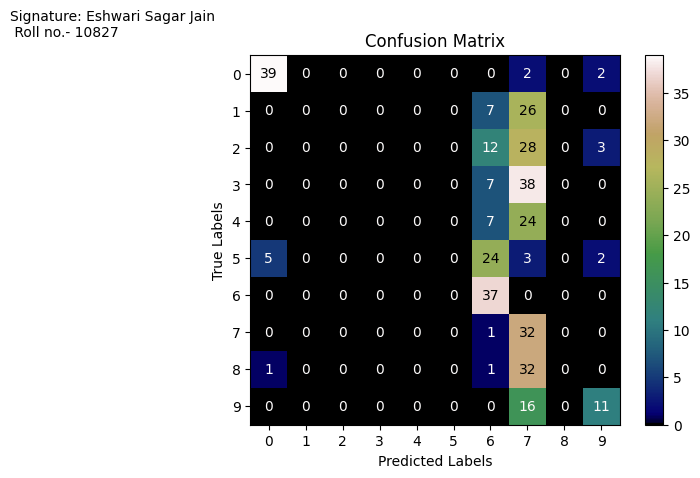

 Reflection: 

1) Logistic Regression performed too good in precision,accuracy etc.

2) The decision tree didn't give acceptable correctness.


In [25]:
# Task 1: Logistic Regression & decision tree
SEED = 68
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # this one i take as we have done with disease and don't wish to use iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import(
    accuracy_score, precision_score,recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay)
digits= load_digits()
X= digits.data
y=digits.target

X_train,X_test,y_train,y_test= train_test_split(
    X,y, test_size=0.2, random_state=SEED
)
log_model= LogisticRegression(max_iter=5000) # logistic regression is like gives us two options i.e. it predicts either a positive term or negative term
log_model.fit(X_train, y_train)
l_pred= log_model.predict(X_test)
acc= accuracy_score(y_test, l_pred)

depth_value=2+(SEED%4)
tree_model= DecisionTreeClassifier(max_depth=depth_value,random_state=SEED)
tree_model.fit(X_train, y_train)
tree_pred= tree_model.predict(X_test)   # as told in lecture training means train a model first by analysing data present and then test it, but testing is more important
acc2= accuracy_score(y_test, tree_pred)

def evaluate_model(true, pred): # prediction is like to predict data by analysing given input datasets.
   return {
    "Accuracy": accuracy_score(true,pred),
    "precision": precision_score(true, pred, average='macro'),
    "recall": recall_score(true, pred, average='macro'),
    "f1": f1_score(true, pred, average='macro')
}

l_results = evaluate_model(y_test,l_pred)
tree_results= evaluate_model(y_test, tree_pred)

results_df = pd.DataFrame([l_results, tree_results], index=["Logistic Regression","Decision Tree"])
print("Performance comparison:\n")
print(results_df)
c= confusion_matrix(y_test, tree_pred)

plt.figure(figsize=(10, 8))
disp= ConfusionMatrixDisplay(confusion_matrix=c)
disp.plot(cmap="gist_earth")
plt.title("Confusion Matrix")  # confusion matrix is which gives true values and predicted output
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.text(-7,-1, "Signature: Eshwari Sagar Jain \n Roll no.- 10827", fontsize=10)
plt.savefig("digits_confusion_matrix.png",dpi=300)
plt.show()

print(" Reflection: \n")
print("1) Logistic Regression performed too good in precision,accuracy etc.\n")
print("2) The decision tree didn't give acceptable correctness.")